In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_tables_openmp(base_path, report_name):
    res = []

    for i in range(1,5):
        index = pow(2, i)
        res.append(pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt').to_numpy())
    
    return res

In [4]:
def get_tables_TBB(base_path, report_name):
    return pd.read_csv(base_path + '/TBB/' + report_name + '.txt').to_numpy() 

In [5]:
def get_table_sequential(base_path, report_name):
    return pd.read_csv(base_path + '/Sequential/' + report_name + '.txt').to_numpy() 

In [6]:
openMP_revision = get_tables_openmp(path_revision, 'report_path_reconstruction')

In [7]:
tbb_revision = get_tables_TBB(path_revision, 'report_path_reconstruction')

In [8]:
sequential_revision = get_table_sequential(path_revision, 'report_path_reconstruction')

In [9]:
def create_row(seq, open, idx, idy):
    tmp_row = [seq[idx, idy]]

    for i in range(4):
        tmp_row.append(open[i][idx, idy])
    
    return tmp_row

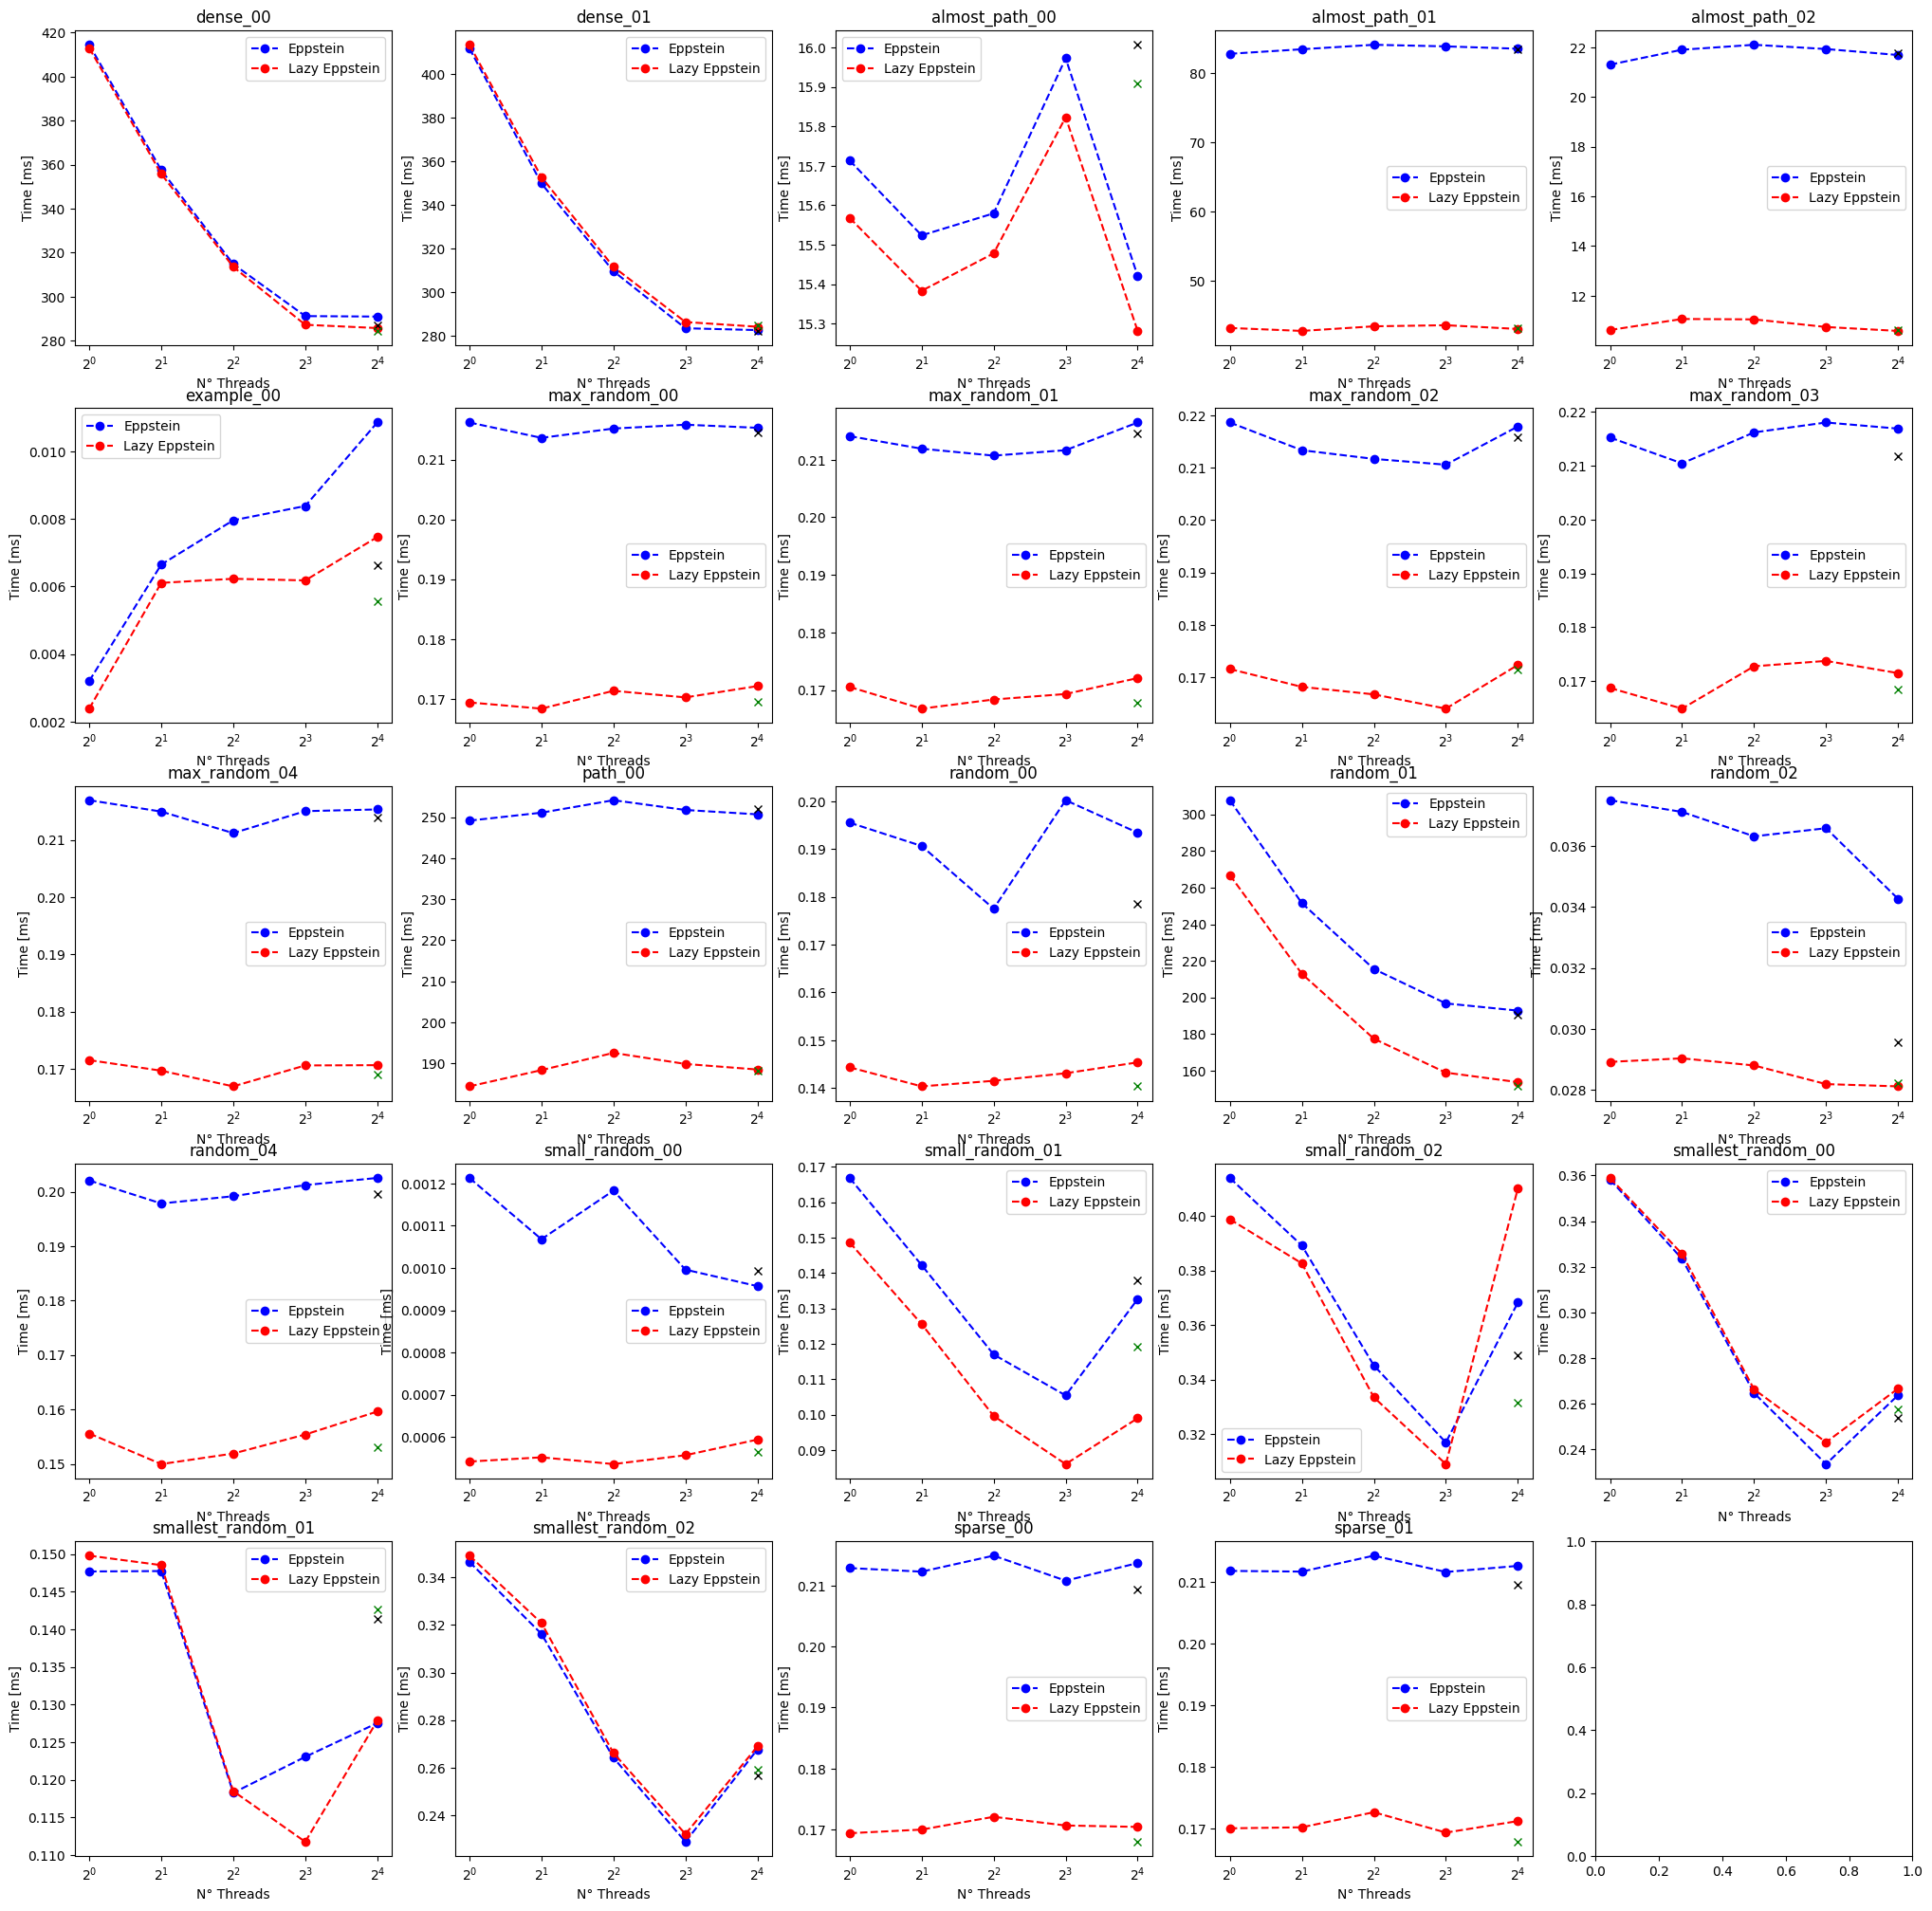

In [10]:
fix, axs = plt.subplots(5,5, figsize=(25, 25))

# Plot each model in a subplot
for i, ax in enumerate(axs.flat):
    if i == 24:
        continue

    ax.set_title(sequential_revision[i, 0])

    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, i, 1), '--bo')
    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, i, 2), '--ro')

    ax.plot(16, tbb_revision[i,1], 'kx')
    ax.plot(16, tbb_revision[i,2], 'gx')

    ax.set_xlabel('N° Threads')
    ax.set_ylabel('Time [ms]')

    ax.set_xscale('log', base=2)
    ax.legend(['Eppstein', 'Lazy Eppstein'])